# 📈 Análisis de Factores de Riesgo en Diabetes y Estilo de Vida

**Dataset:** Diabetes_and_Lifestyle_Dataset.csv  
**Objetivo:** Analizar cómo influyen variables demográficas y de estilo de vida en el riesgo de diabetes a traves de graficos

##### <span style="color:#e74c3c;">🔧 1. Configuración e Importación de Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100


df = pd.read_csv('./Diabetes_and_LifeStyle_Dataset .csv')


### <span style="color:#3498db;">¿Cómo influyen la edad, género y etnia en el riesgo de diabetes?

##### Distribución de edad por estado de diabetes

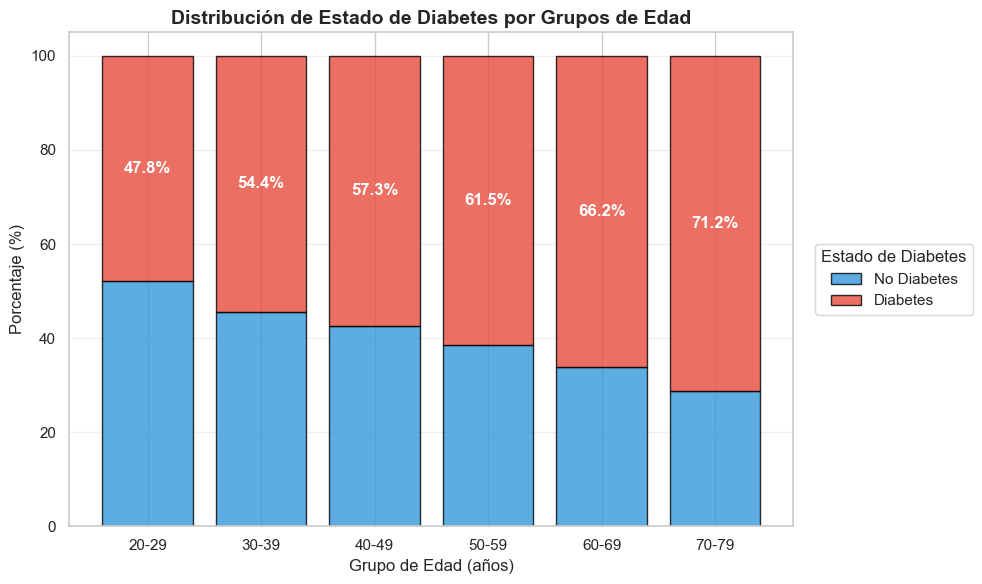

In [13]:
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

tabla_edad = df.groupby(['age_group', 'diagnosed_diabetes']).size().unstack()
tabla_edad_pct = tabla_edad.div(tabla_edad.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10, 6))

bottom = np.zeros(len(tabla_edad_pct))
colors = ['#3498db', '#e74c3c']

for i, (diagnosis, color) in enumerate(zip([0, 1], colors)):
    values = tabla_edad_pct[diagnosis] if diagnosis in tabla_edad_pct.columns else 0
    plt.bar(tabla_edad_pct.index, values, bottom=bottom, 
            color=color, alpha=0.8, edgecolor='black',
            label='Diabetes' if diagnosis == 1 else 'No Diabetes')
    if i == 1:  
        for j, val in enumerate(values):
            plt.text(j, bottom[j] + val/2, f'{val:.1f}%', 
                    ha='center', va='center', color='white', fontweight='bold')
    bottom += values

plt.title('Distribución de Estado de Diabetes por Grupos de Edad', 
          fontsize=14, fontweight='bold')
plt.xlabel('Grupo de Edad (años)', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.legend(
    title='Estado de Diabetes',
    fontsize=11,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    frameon=True
)
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

El gráfico muestra la distribución porcentual del estado de diabetes según grupos de edad. Se observa que la proporción de individuos diagnosticados con diabetes aumenta progresivamente con la edad, siendo notablemente mayor en los grupos etarios más avanzados. En los grupos más jóvenes predomina la población sin diagnóstico de diabetes, mientras que en los grupos de mayor edad la diferencia entre individuos con y sin diabetes se reduce, lo que sugiere un incremento del riesgo de diabetes asociado al envejecimiento.

##### Distribución del riesgo de diabetes por etnia

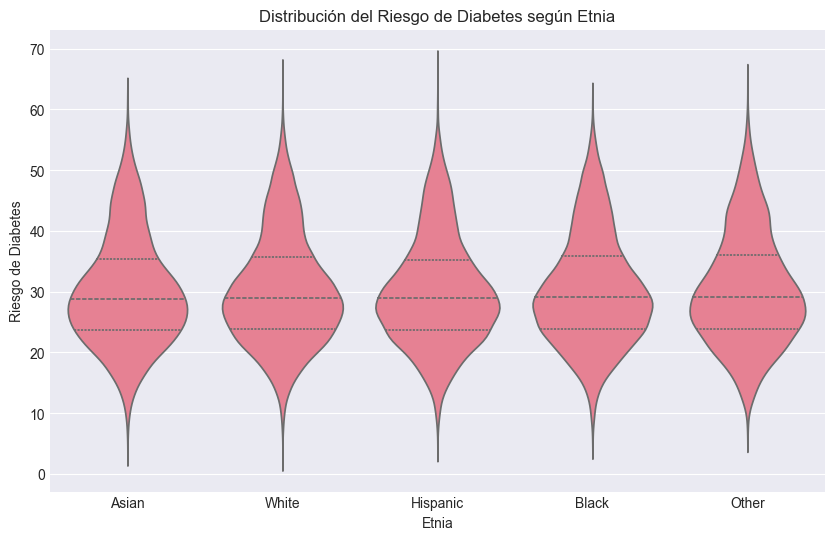

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='ethnicity',
    y='diabetes_risk_score',
    data=df,
    inner='quartile'
)
plt.title('Distribución del Riesgo de Diabetes según Etnia')
plt.xlabel('Etnia')
plt.ylabel('Riesgo de Diabetes')
plt.show()

El diagrama de violín indica que la distribución del puntaje de riesgo de diabetes es ampliamente similar entre los distintos grupos étnicos incluidos en el conjunto de datos. Si bien se observan ligeras variaciones en las medianas y en la dispersión de los valores entre etnias, estas diferencias son relativamente pequeñas en comparación con la variabilidad interna de cada grupo. En conjunto, los resultados sugieren que, dentro de esta muestra, la etnia no muestra una asociación fuerte con el riesgo de diabetes, y que la variabilidad del riesgo está predominantemente influenciada por factores individuales más que por la pertenencia étnica.

##### Riesgo medio de diabetes por grupo de edad y género

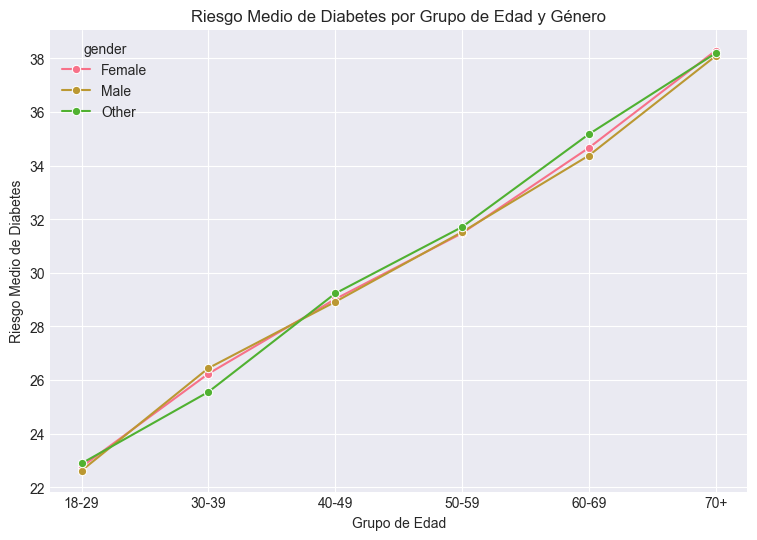

In [6]:
df_plot = df[['Age', 'gender', 'diabetes_risk_score']].dropna()

df_plot['age_group'] = pd.cut(
    df_plot['Age'],
    bins=[18, 30, 40, 50, 60, 70, 90],
    labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
)

# Calcular riesgo medio
risk_by_age_gender = (
    df_plot
    .groupby(['age_group', 'gender'])['diabetes_risk_score']
    .mean()
    .reset_index()
)

# Gráfica
plt.figure(figsize=(9, 6))
sns.lineplot(
    data=risk_by_age_gender,
    x='age_group',
    y='diabetes_risk_score',
    hue='gender',
    marker='o'
)

plt.title('Riesgo Medio de Diabetes por Grupo de Edad y Género')
plt.xlabel('Grupo de Edad')
plt.ylabel('Riesgo Medio de Diabetes')
plt.show()

El riesgo medio de diabetes aumenta con la edad en todos los géneros. Las diferencias entre mujeres y hombres son moderadas, mientras que el grupo “otro” muestra mayor variabilidad debido a un menor número de observaciones.

### <span style="color:#3498db;"> ¿Qué influencia pueden tener los antecedentes familiares en el riesgo de diabetes?

##### Riesgo de diabetes según antecedentes familiares

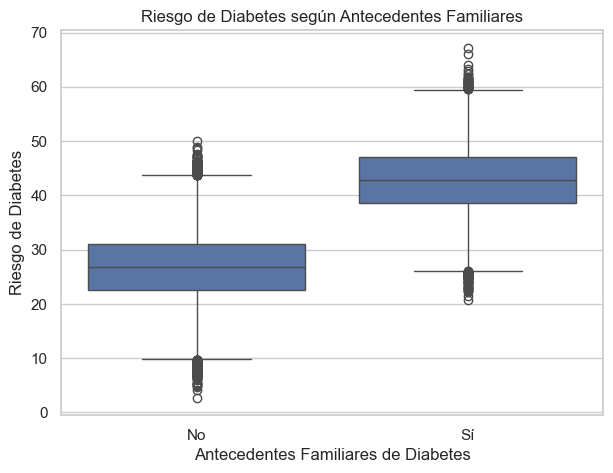

In [14]:
df_plot = df[['family_history_diabetes', 'diabetes_risk_score']].dropna()

df_plot['family_history_diabetes'] = df_plot['family_history_diabetes'].map({
    0: 'No',
    1: 'Sí'
})

plt.figure(figsize=(7, 5))
sns.boxplot(
    data=df_plot,
    x='family_history_diabetes',
    y='diabetes_risk_score'
)

plt.title('Riesgo de Diabetes según Antecedentes Familiares')
plt.xlabel('Antecedentes Familiares de Diabetes')
plt.ylabel('Riesgo de Diabetes')
plt.show()

A partir del gráfico se concluye que la presencia de antecedentes familiares de diabetes está asociada con un mayor riesgo de desarrollar la enfermedad.
Las personas con antecedentes no solo presentan valores medianos de riesgo más elevados, sino también una mayor variabilidad y una mayor proporción de casos con riesgo alto.La presencia de valores atípicos en ambos grupos indica que, si bien los antecedentes familiares influyen significativamente en el riesgo de diabetes, no son el único factor determinante. Existen individuos sin antecedentes que presentan un riesgo elevado, así como individuos con antecedentes cuyo riesgo es bajo.

### <span style="color:#3498db;">¿Cómo se relaciona el riesgo de diabetes con los factores de estilo de vida y la antropometría?

##### Tendencia del riesgo de diabetes según el índice de masa corporal

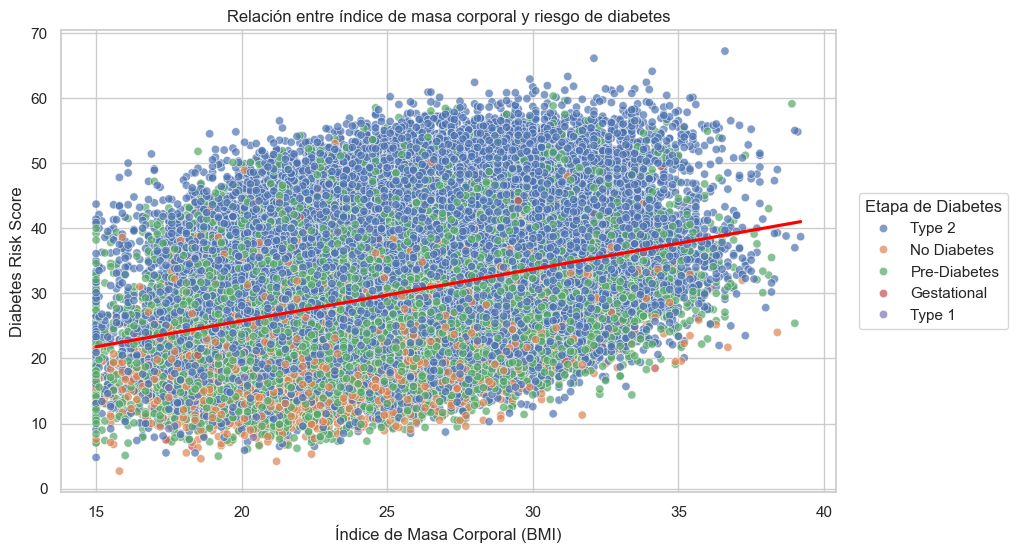

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='bmi', y='diabetes_risk_score', hue='diabetes_stage', alpha=0.7)
sns.regplot(data=df, x='bmi', y='diabetes_risk_score', scatter=False, color='red') 

plt.title('Relación entre índice de masa corporal y riesgo de diabetes')
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Diabetes Risk Score')
plt.legend(title='Etapa de Diabetes',loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=True)
plt.show()

El gráfico muestra que el riesgo de diabetes tiende a aumentar a medida que se incrementa el índice de masa corporal, una relación confirmada por la línea de regresión roja, que indica que las personas con mayor IMC presentan un riesgo más alto. Esta tendencia es consistente y clara. Sin embargo, dentro de cada rango de IMC existe dispersión: algunas personas con IMC normal presentan riesgo elevado, mientras que algunas con IMC alto tienen riesgo moderado, lo que sugiere que otros factores también influyen en el riesgo de diabetes. Además, al diferenciar por etapa de diabetes, se observa que las personas en etapas avanzadas se concentran en la zona superior derecha del gráfico (IMC alto y riesgo elevado), mientras que aquellas en etapas iniciales o sin diagnóstico están más dispersas, cubriendo principalmente rangos bajos y medios de IMC y riesgo.

##### Tendencia del riesgo de diabetes según los minutos de actividad física por semana

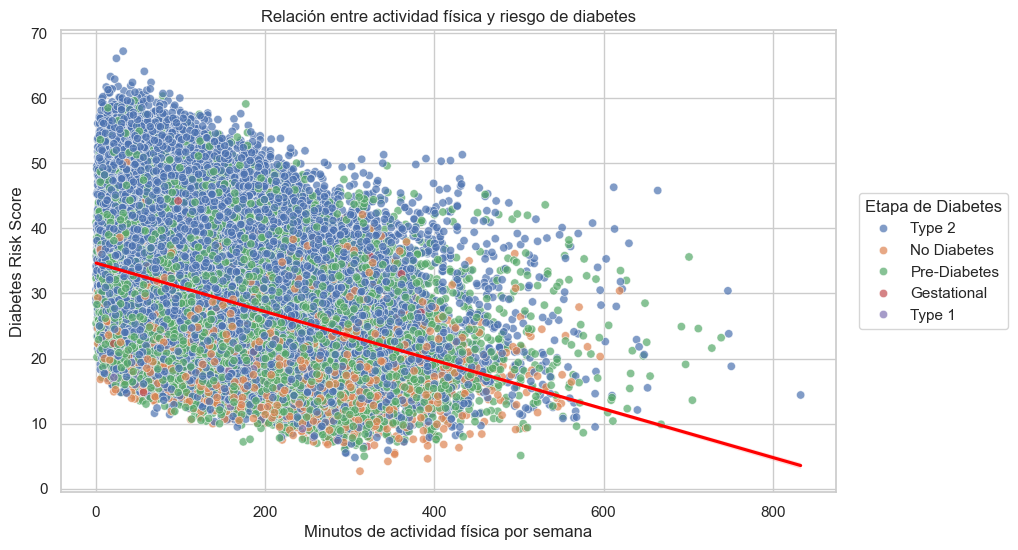

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='physical_activity_minutes_per_week', 
    y='diabetes_risk_score', 
    hue='diabetes_stage', 
    alpha=0.7
)
sns.regplot(
    data=df, 
    x='physical_activity_minutes_per_week', 
    y='diabetes_risk_score', 
    scatter=False, 
    color='red'
)

plt.title('Relación entre actividad física y riesgo de diabetes')
plt.xlabel('Minutos de actividad física por semana')
plt.ylabel('Diabetes Risk Score')
plt.legend(title='Etapa de Diabetes',loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=True)
plt.show()

El gráfico muestra que a mayor actividad física semanal, el riesgo de diabetes tiende a disminuir, confirmando la relación negativa observada en la línea de regresión. Sin embargo, hay variabilidad: algunas personas con poca actividad presentan riesgo moderado o bajo, y algunas con alta actividad muestran riesgo relativamente alto, indicando que otros factores como peso, genética y alimentación también influyen. Las etapas avanzadas de diabetes se concentran en individuos con menor actividad y mayor riesgo, mientras que los casos tempranos o sin diagnóstico presentan menor riesgo y mayor dispersión en la actividad física.

##### Riesgo promedio de diabetes según índice de masa corporal y actividad física

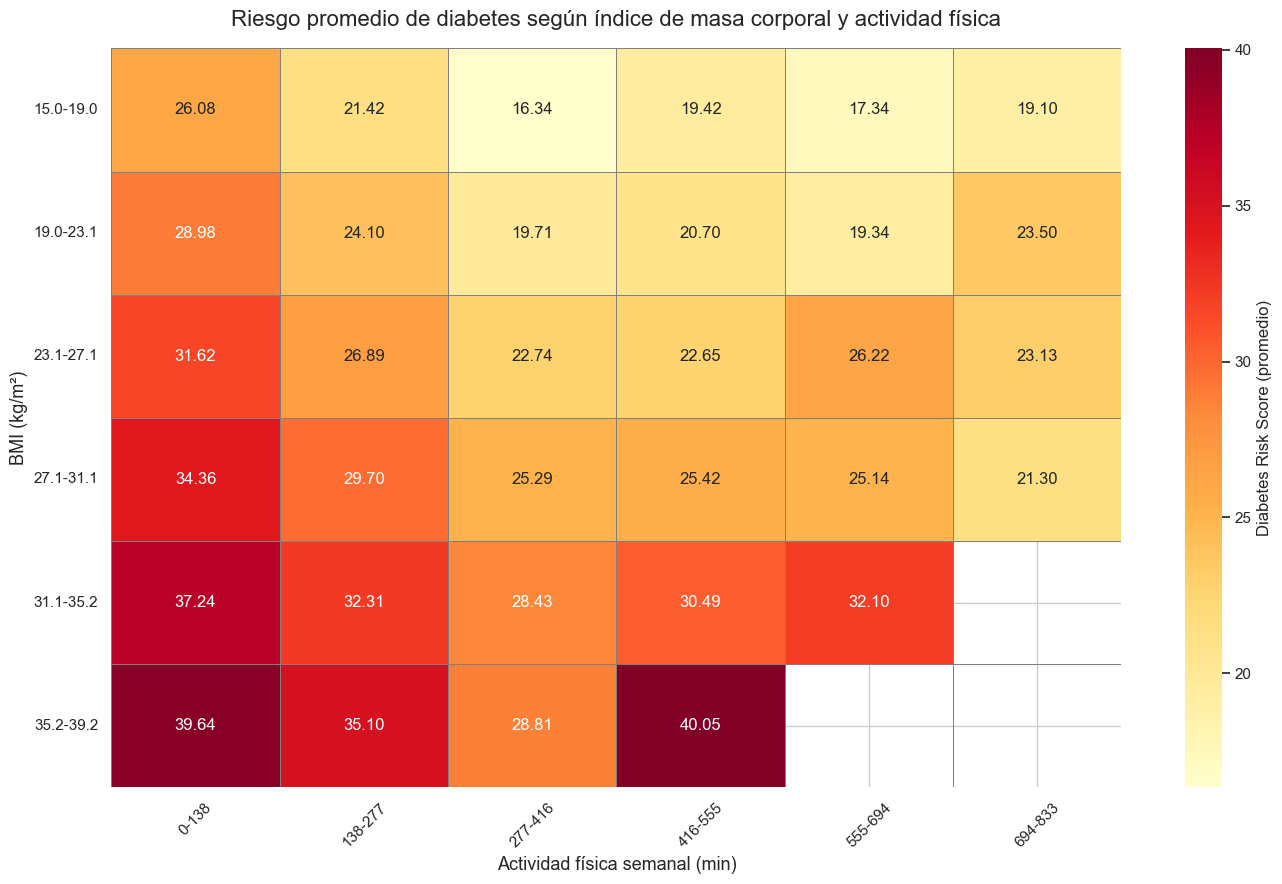

In [21]:
n_activity_bins = 6
n_bmi_bins = 6
figsize = (14,9)

#  intervalos de actividad fisica
activity_edges = np.linspace(
    df['physical_activity_minutes_per_week'].min(),
    df['physical_activity_minutes_per_week'].max(),
    n_activity_bins + 1
)

activity_labels = [
    f"{int(activity_edges[i])}-{int(activity_edges[i+1])}"
    for i in range(len(activity_edges)-1)
]

df['activity_bin'] = pd.cut(
    df['physical_activity_minutes_per_week'],
    bins=activity_edges,
    labels=activity_labels,
    include_lowest=True
)

# intervalos de indice de masa corporal
bmi_edges = np.linspace(
    df['bmi'].min(),
    df['bmi'].max(),
    n_bmi_bins + 1
)

bmi_labels = [
    f"{bmi_edges[i]:.1f}-{bmi_edges[i+1]:.1f}"
    for i in range(len(bmi_edges)-1)
]

df['bmi_bin'] = pd.cut(
    df['bmi'],
    bins=bmi_edges,
    labels=bmi_labels,
    include_lowest=True
)

pivot_risk = pd.pivot_table(
    df,
    index='bmi_bin',
    columns='activity_bin',
    values='diabetes_risk_score',
    aggfunc='mean'
)

plt.figure(figsize=figsize)

sns.heatmap(
    pivot_risk,
    annot=True,
    fmt='.2f',
    cmap='YlOrRd',
    cbar_kws={'label': 'Diabetes Risk Score (promedio)'},
    linewidths=0.6,
    linecolor='gray'
)

plt.title(
    'Riesgo promedio de diabetes según índice de masa corporal y actividad física',
    fontsize=16,
    pad=16
)

plt.xlabel('Actividad física semanal (min)', fontsize=13)
plt.ylabel('BMI (kg/m²)', fontsize=13)

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


En el mapa de calor se observa que las celdas correspondientes a IMC más alto y menor actividad física presentan los valores de riesgo más elevados, mientras que los individuos con IMC más bajo y mayor actividad física presentan riesgo más bajo. Esto confirma la interacción entre estos dos factores de estilo de vida y antropométricos: tanto un mayor peso como la baja actividad física se asocian con un incremento del riesgo de diabetes. La visualización también permite identificar áreas intermedias donde el riesgo es moderado, reflejando que otros factores adicionales pueden influir en el riesgo dentro de cada combinación de IMC y actividad física.

##### Relación del riesgo de diabetes con las dietas

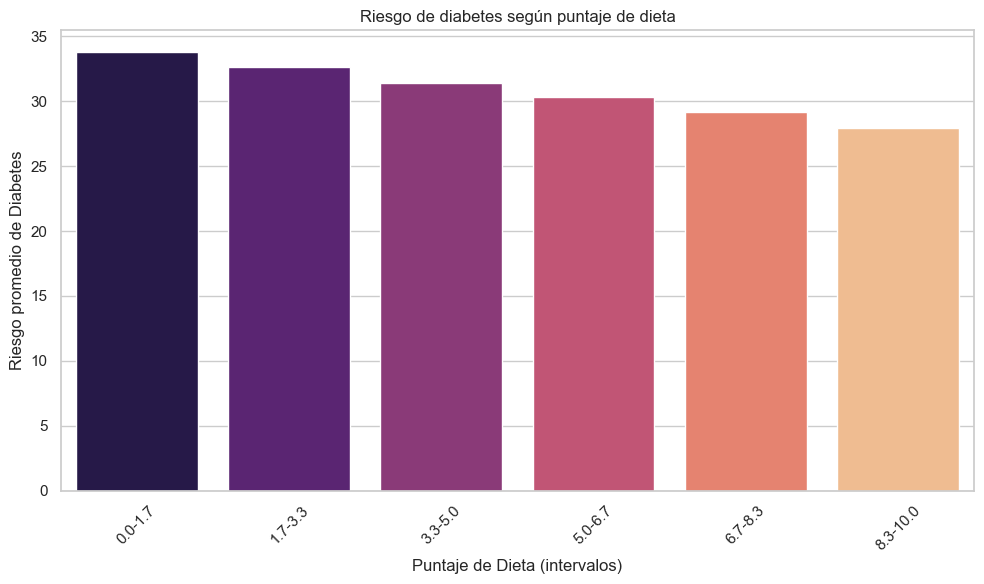

In [24]:
df_plot = df.copy()
df_plot['diet_score'] = df_plot['diet_score'].fillna(df_plot['diet_score'].mean())
df_plot['diabetes_risk_score'] = df_plot['diabetes_risk_score'].fillna(df_plot['diabetes_risk_score'].mean())

n_bins = 6
diet_bins = np.linspace(df_plot['diet_score'].min(), df_plot['diet_score'].max(), n_bins + 1)
diet_labels = [f"{diet_bins[i]:.1f}-{diet_bins[i+1]:.1f}" for i in range(n_bins)]
df_plot['diet_bin'] = pd.cut(df_plot['diet_score'], bins=diet_bins, labels=diet_labels, include_lowest=True)

risk_by_diet = df_plot.groupby('diet_bin')['diabetes_risk_score'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=risk_by_diet,
    x='diet_bin',
    y='diabetes_risk_score',
    palette='magma'
)

plt.xlabel('Puntaje de Dieta (intervalos)')
plt.ylabel('Riesgo promedio de Diabetes')
plt.title('Riesgo de diabetes según puntaje de dieta')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico muestra que a medida que aumenta el puntaje de dieta, el riesgo de diabetes tiende a disminuir. Aunque la magnitud del efecto es relativamente débil, la tendencia es consistente a lo largo de los intervalos de dieta.

##### Tendencia de riesgo de diabetes según tabaquismo

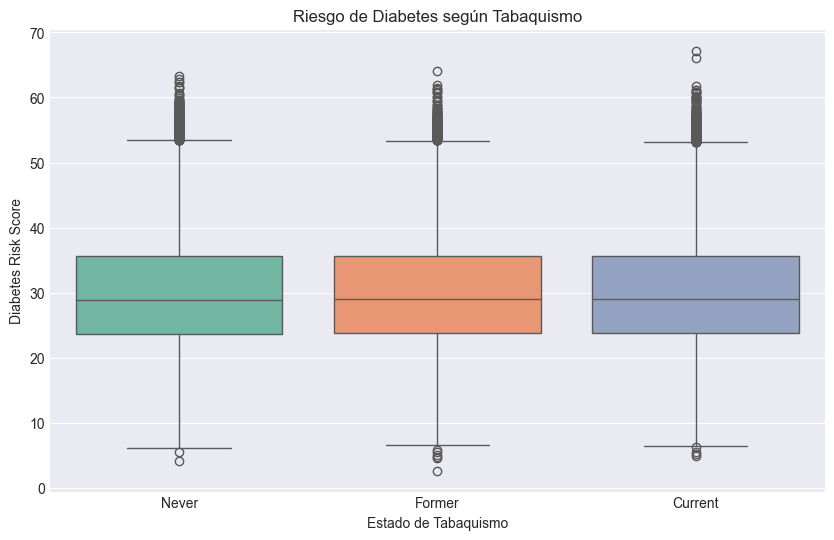

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='smoking_status', y='diabetes_risk_score', palette='Set2')
plt.title('Riesgo de Diabetes según Tabaquismo')
plt.xlabel('Estado de Tabaquismo')
plt.ylabel('Diabetes Risk Score')
plt.show()

El gráfico de cajas y bigotes muestra que las medianas del riesgo de diabetes son muy similares entre los tres grupos de tabaquismo: nunca, antiguo y actual. Se observan valores atípicos altos en todos los grupos, lo que indica que el riesgo elevado de diabetes no es exclusivo de un estado particular de tabaquismo. Visualmente, no se aprecia una separación clara entre fumadores actuales, exfumadores y personas que nunca han fumado, sugiriendo que, dentro de esta muestra, el estado de tabaquismo no presenta una asociación evidente con el riesgo promedio de diabetes.

##### Tendencia del riesgo de diabetes según consumo de alcohol 

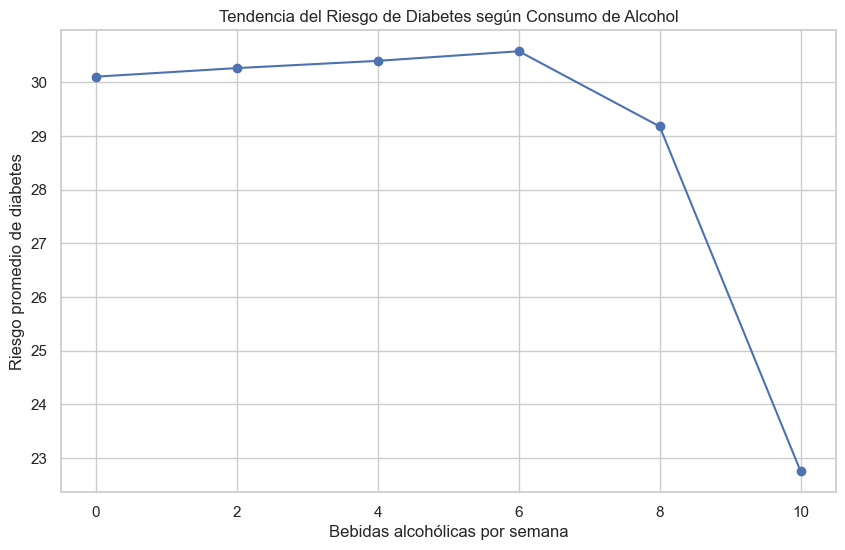

In [28]:
df['alcohol_group'] = (df['alcohol_consumption_per_week'] // 2) * 2

alcohol_line = (
    df.groupby('alcohol_group')['diabetes_risk_score']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
plt.plot(
    alcohol_line['alcohol_group'],
    alcohol_line['diabetes_risk_score'],
    marker='o'
)

plt.title('Tendencia del Riesgo de Diabetes según Consumo de Alcohol')
plt.xlabel('Bebidas alcohólicas por semana')
plt.ylabel('Riesgo promedio de diabetes')
plt.grid(True)
plt.show()

El gráfico muestra que el riesgo promedio de diabetes se mantiene prácticamente estable entre 0 y 6 bebidas alcohólicas por semana, con un leve incremento apenas perceptible. A partir de consumos más altos, la tendencia presenta fluctuaciones, incluyendo una caída pronunciada en el último intervalo. La ausencia de un patrón claro y consistente sugiere que, dentro de esta muestra, no existe una relación lineal fuerte entre el consumo de alcohol y el riesgo de diabetes, indicando que otros factores probablemente influyen más significativamente en el riesgo individual.

##### Riesgo de diabetes según historial médico

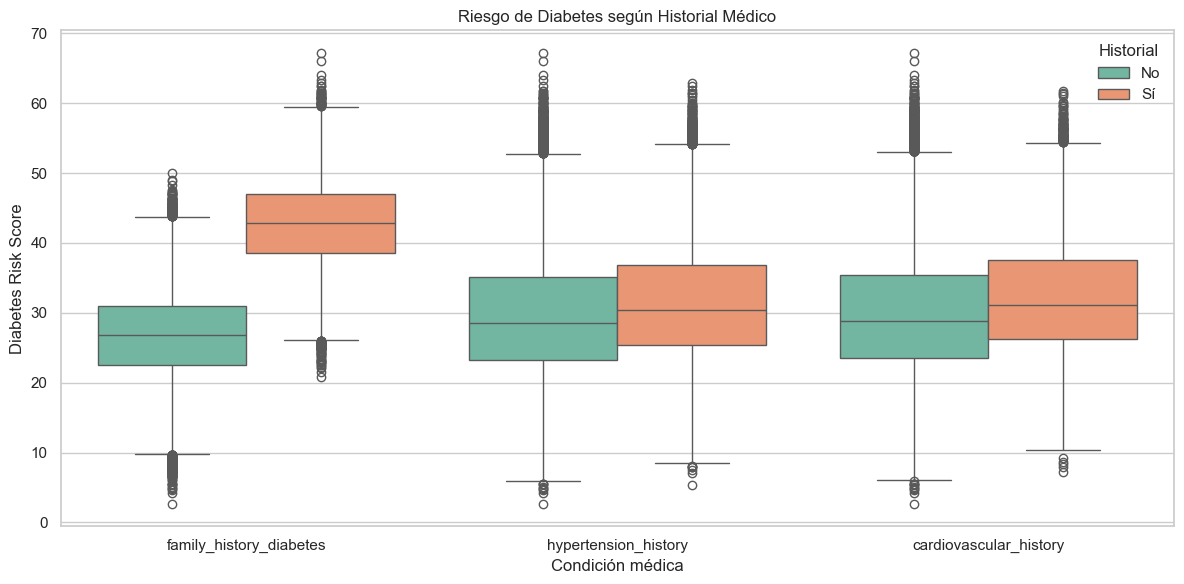

In [27]:
medical_vars = [ 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', ] 
df_medical = df.melt( value_vars=medical_vars, value_name='Historial', var_name='Condición' ) 
df_medical['diabetes_risk_score'] = pd.concat( [df['diabetes_risk_score']] * len(medical_vars), ignore_index=True )
plt.figure(figsize=(12,6))

ax = sns.boxplot(
    data=df_medical,
    x='Condición',
    y='diabetes_risk_score',
    hue='Historial',
    palette='Set2' 
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['No', 'Sí'], title='Historial')

plt.title('Riesgo de Diabetes según Historial Médico')
plt.xlabel('Condición médica')
plt.ylabel('Diabetes Risk Score')
plt.tight_layout()
plt.show()


El gráfico de cajas y bigotes muestra el riesgo de diabetes según la presencia o ausencia de antecedentes médicos: familiar, hipertensión y enfermedades cardiovasculares. Se observa que los individuos con antecedentes positivos (“Sí”) tienden a presentar un riesgo de diabetes promedio más elevado en comparación con aquellos sin dichos antecedentes (“No”), especialmente en antecedentes familiares de diabetes.

##### ¿Cómo se relacionan la presión arterial y la frecuencia cardíaca según la etapa de diabetes?

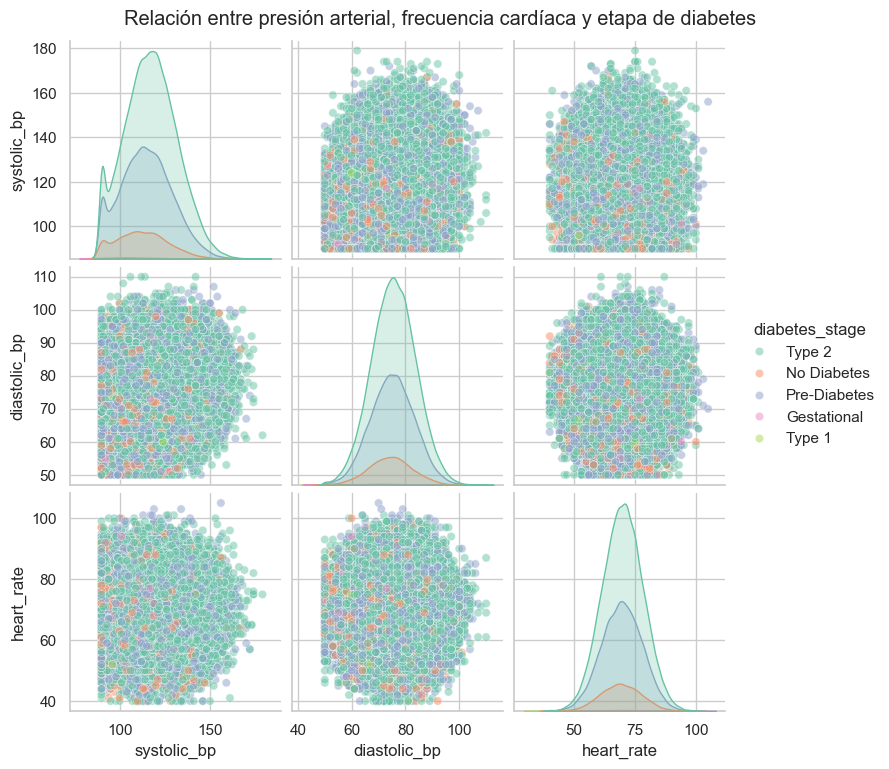

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las columnas de interés
df_plot = df[['systolic_bp', 'diastolic_bp', 'heart_rate', 'diabetes_stage']].dropna()

# Gráfico tipo pairplot
sns.set(style="whitegrid")
sns.pairplot(
    df_plot,
    hue='diabetes_stage',          # colorea según la etapa de diabetes
    diag_kind='kde',               # densidad en la diagonal
    palette='Set2',
    plot_kws={'alpha':0.5}         # transparencia para ver densidad
)
plt.suptitle("Relación entre presión arterial, frecuencia cardíaca y etapa de diabetes", y=1.02)
plt.show()


**Estructura general del gráfico:**
1. Filas y columnas: representan las variables continuas (systolic_bp, diastolic_bp, heart_rate).

2. Diagonal: muestra la distribución de cada variable por categoría (diabetes_stage).

3. Fuera de la diagonal: cada celda es un scatterplot que cruza dos variables. Cada punto representa un individuo. Los colores indican la categoría de diabetes_stage.

Como se evidencia fuera de la diagonal, los puntos están muy dispersos, lo que indica que no hay una relación lineal fuerte entre ambas variables.